# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

### 1.1.1 Load and summarise the data

In [2]:
### Your code here
# Load the data
df = pd.read_csv('./SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
# Check the statistics of the data
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


### 1.1.2 Visualise features

#### 1.1.2.1 Rented Bike Count

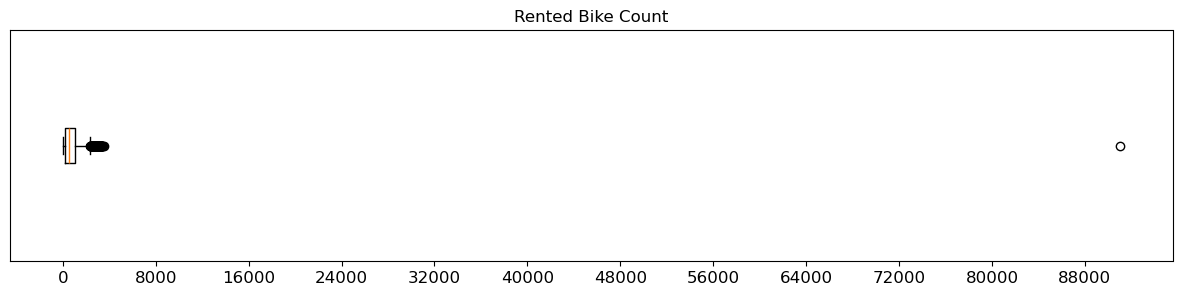

In [5]:
# Plotting 'Rented Bike Count' column

# Create plot
plt.figure(figsize=(15, 3))

# Plotting
plt.boxplot(df['Rented Bike Count'], vert=False)
plt.title('Rented Bike Count')
plt.yticks([])
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))

# Show plot
plt.show()

There is an extremely large value in the "Rented Bike Count" column

#### 1.1.2.2 Temperature, Humidity and Wind speed

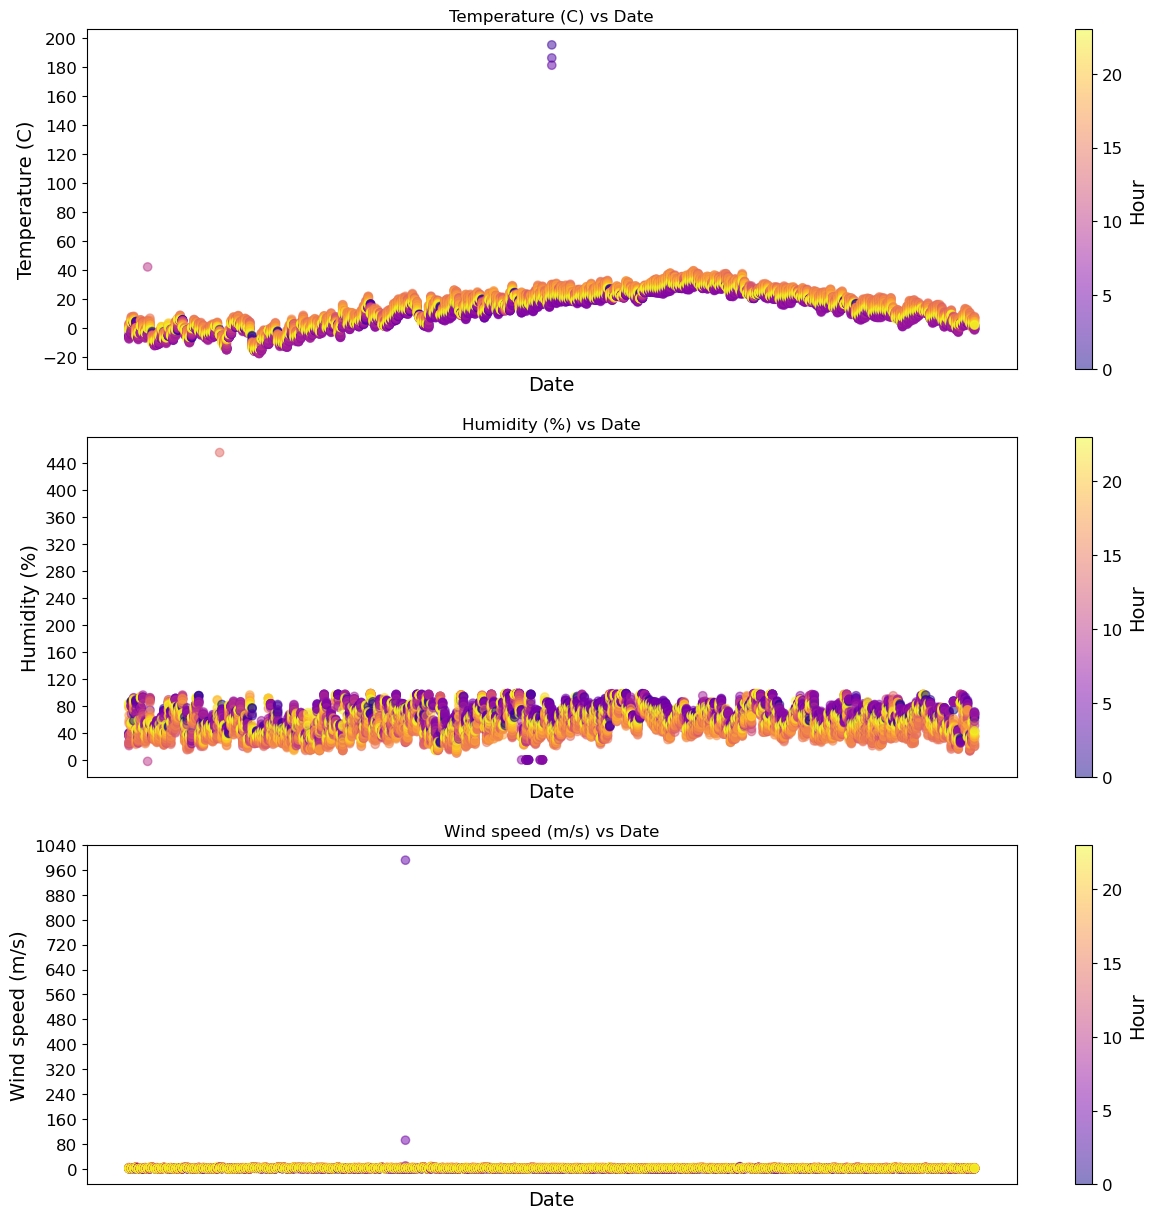

In [6]:
# Plotting 'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)' values vs 'Date' and 'Hour'
# List of columns to scatter plots
col_plots = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)']

# Create a figure and axes
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plotting
for i, column in enumerate(col_plots):
    sc = axs[i].scatter(df['Date'], df[column], c=df['Hour'], cmap='plasma', alpha=0.5)
    axs[i].set_ylabel(column)
    axs[i].set_xlabel('Date')   
    axs[i].set_title(column + ' vs Date')
    axs[i].set_xticks([])
    axs[i].yaxis.set_major_locator(MaxNLocator(nbins=15))

    # Add colorbar
    cbar = plt.colorbar(sc, ax=axs[i])
    cbar.set_label('Hour')

# Show plot
plt.show()

Values can be considered as outliers:
- Temperature has 4 values greater than 40
- Humidity has 1 value greater than 440 and some values equal 0
- Wind speed has 2 values greater than 80

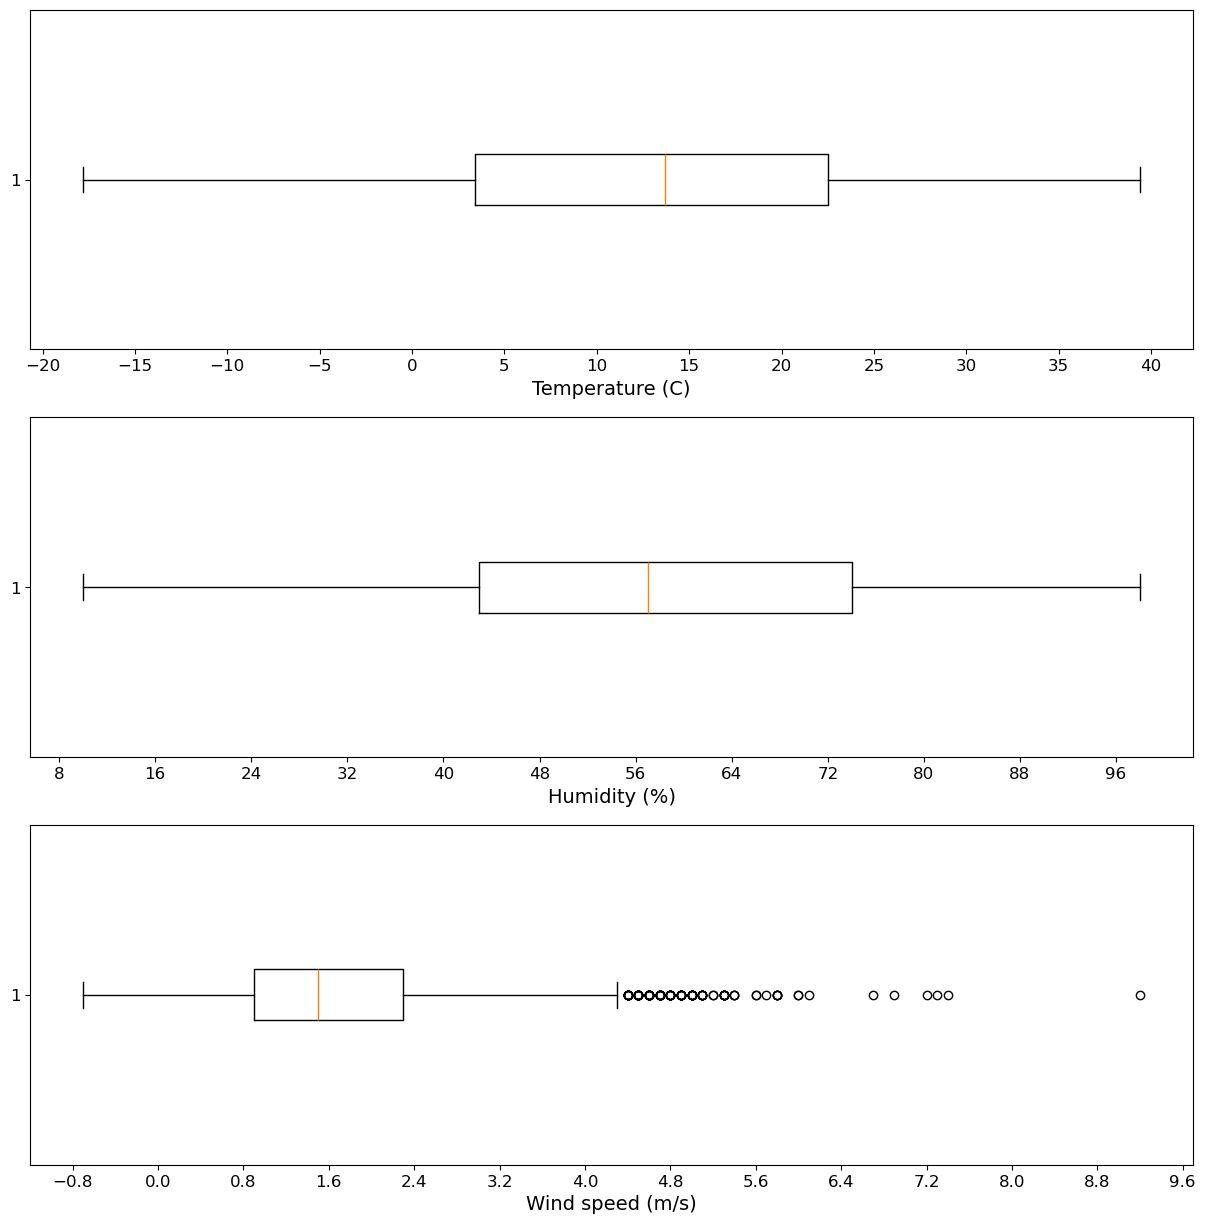

In [7]:
# Remove the outlier and plot it again
data_2 = df.copy()  # Create a copy to modify and plot
data_2 = data_2[(data_2['Temperature (C)'] < 40) & 
                (data_2['Humidity (%)'] > 0) &
                (data_2['Humidity (%)'] < 440) & 
                (data_2['Wind speed (m/s)'] < 80)]

# Create a figure and axes
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=False)

# Plotting
for i, column in enumerate(col_plots):
    sc = axs[i].boxplot(data_2[column], vert=False)
    axs[i].set_xlabel(column)
    axs[i].xaxis.set_major_locator(MaxNLocator(nbins=15))

# Show plot
plt.show()

Wind speed also has values less than 0 and few outliers

#### 1.1.2.3 Visibility and Dew point temperature

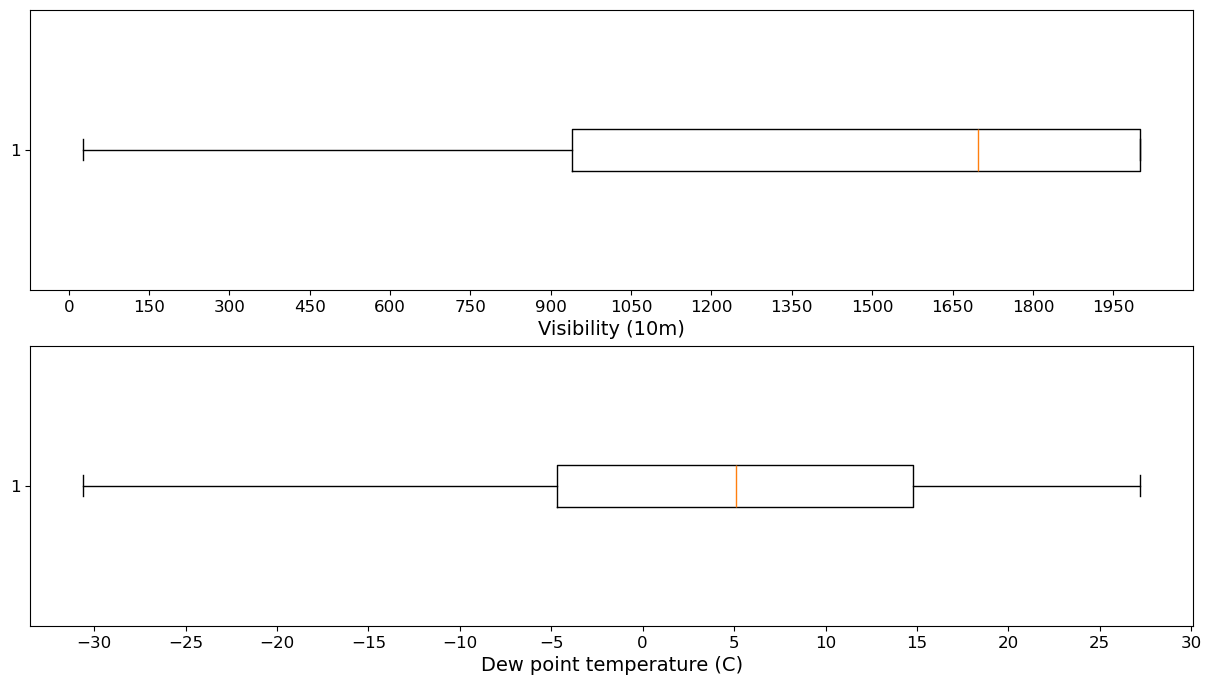

In [8]:
# Plotting 'Visibility (10m)', 'Dew point temperature (C)' columns
# List of columns to box plots
col_boxes = ['Visibility (10m)', 'Dew point temperature (C)']

# Drop non-numerical values 
data_3 = df.loc[:, col_boxes]
data_3 = data_3.applymap(lambda x:pd.to_numeric(x, errors='coerce'))
data_3.dropna(inplace=True) 

# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=False)

# Plotting
for i, column in enumerate(col_boxes):
    sc = axs[i].boxplot(data_3[column], vert=False)
    axs[i].set_xlabel(column)
    axs[i].xaxis.set_major_locator(MaxNLocator(nbins=15))

# Show plot
plt.show()

There is not any outlier in these 2 columns

#### 1.1.2.4 Solar Radiation, Rainfall and Snowfall

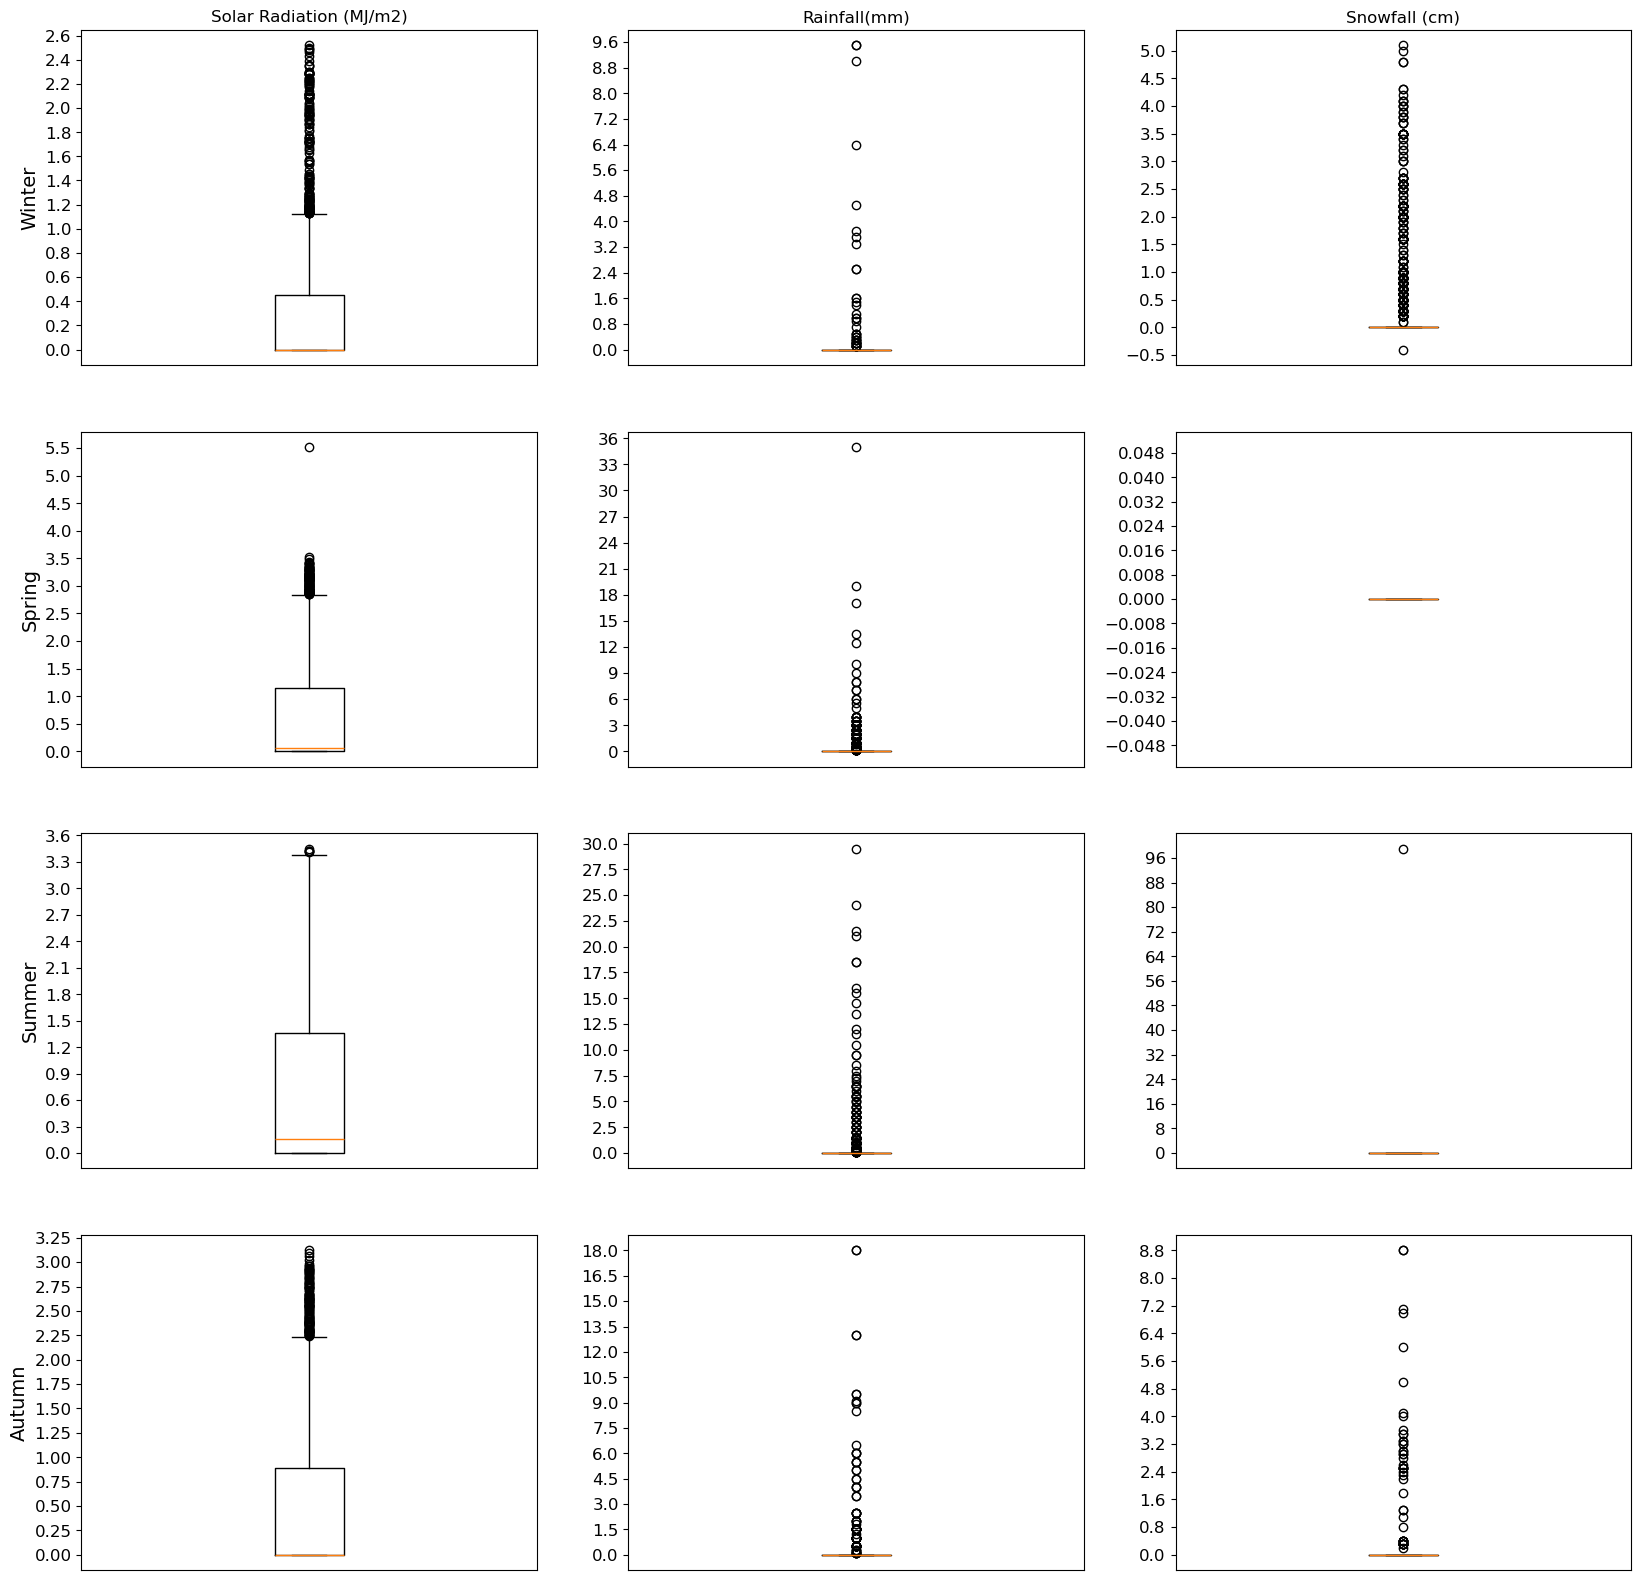

In [9]:
# Plotting 'Visibility (10m)', 'Dew point temperature (C)' columns with 'Seasons'
# List of columns to box plots
col_boxes2 = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Drop non-numerical values 
data_4 = df.loc[:, col_boxes2]
data_4 = data_4.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
data_4 = pd.concat([data_4, df['Seasons']], axis=1)
data_4.dropna(inplace=True)

# Get unique seasons
seasons = data_4['Seasons'].unique()

# Create a figure and axes
fig, axs = plt.subplots(len(seasons), len(col_boxes2), figsize=(20, 20), sharex=True)

# Plotting
for i, season in enumerate(seasons):
    season_data = data_4[data_4['Seasons'] == season]
    for j, column in enumerate(col_boxes2):
        axs[i][j].boxplot(season_data[column])
        if i == 0:  # Set title only for the top row
            axs[i][j].set_title(column)
        if j == 0:  # Set ylabel only for the first column
            axs[i][j].set_ylabel(season)
        axs[i][j].set_xticks([])
        axs[i][j].yaxis.set_major_locator(MaxNLocator(nbins=15))

# Show plot
plt.show()

There are a lot of outliers in these 3 columns. A few obvious outliers are:
- Solar Radiation greater than 5 in Spring
- Rainfall greater than 33 in Spring
- Snowfall greater than 96 in Summer

#### 1.1.2.5 Hour, Seasons, Holiday and Functioning Day

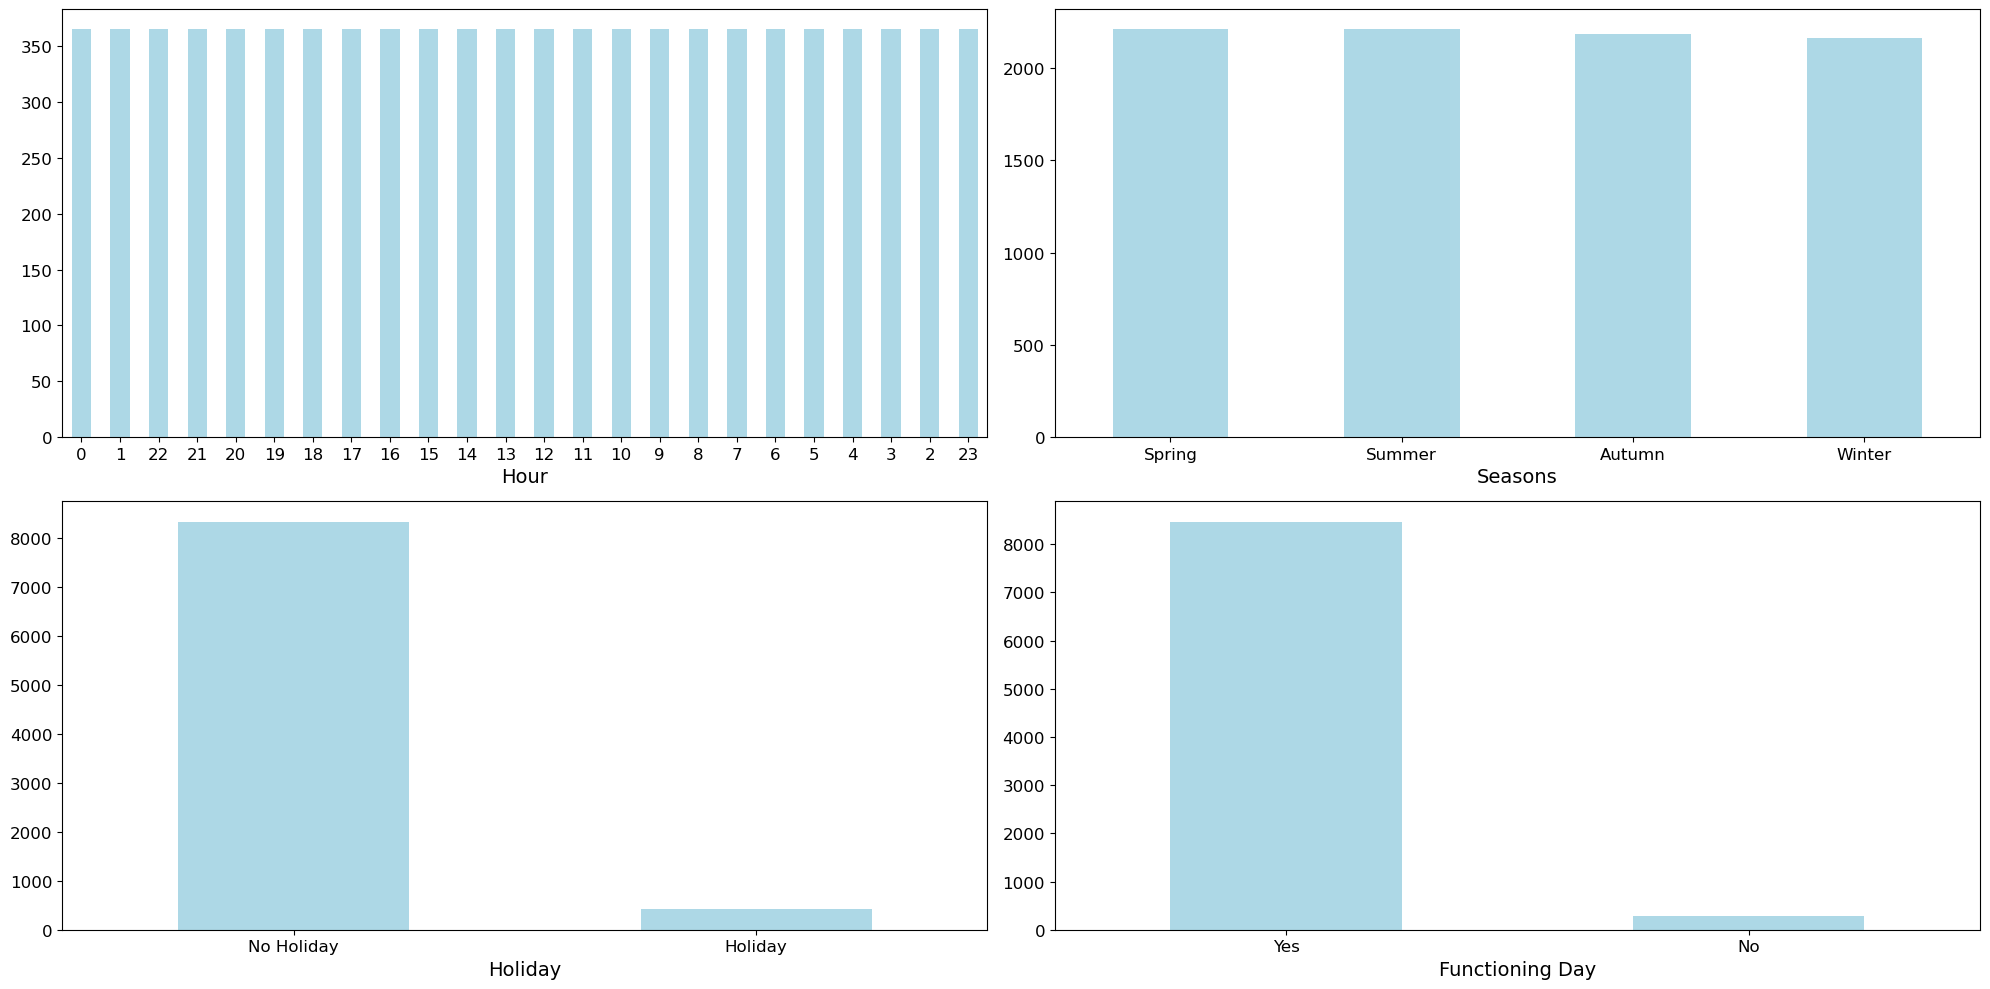

In [10]:
# Plotting 'Hour', 'Seasons', 'Holiday', 'Functioning Day' columns
# List of columns to bar plots
col_bars = ['Hour', 'Seasons', 'Holiday', 'Functioning Day']  

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Flatten the axes
axes = axes.flatten()

# Plotting
for ax, column in zip(axes, col_bars):
    df[column].value_counts().plot(kind='bar', ax=ax, color='lightblue')
    # ax.set_title(column, loc='center')  
    ax.xaxis.set_tick_params(rotation=0)
    ax.grid(False)  

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Hour and Seasons are equally distributed, while Holiday and Functioning Day are not.

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Weekday** feature with a binary weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [11]:
## Example code for weekday feature mapping ##
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [12]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, iqr_factor=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    # Filter data within the bounds
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [13]:
### Your code here (and remember to upload the resulting csv)
# Remove not operating days and drop the 'Functioning Day' column
data = df.loc[df['Functioning Day'] == 'Yes']
data = data.drop(columns=['Functioning Day'])

# Convert season to one-hot encoding
data = pd.get_dummies(data, columns=['Seasons'], dtype=int)

# Replace 'Holiday' and 'No Holiday' with 1 and 0
data['Holiday'] = data['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})

# Create 'Weekday' column with a binary weekday feature
# and drop the 'Date' column
data['Weekday'] = data['Date'].apply(date_is_weekday)
data = data.drop(columns=['Date'])

# Convert non-numeric features to numeric
data = data.applymap(lambda x:pd.to_numeric(x, errors='coerce'))

# Remove the outlier of 'Rented Bike Count'
data = data[data['Rented Bike Count'] < 8000]

# Remove outliers using IQR
col_remove_outliers = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)',
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in col_remove_outliers:
    data[col] = remove_outliers_iqr(data[col])

# Save the cleaned data
data.to_csv('./SeoulBikeData_Cleaned.csv', index=False)

Rented Bike Count is the response of the regression model, so it should only be removed the obvious outliers instead of using IQR to remove.

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [14]:
### Your code here
# Pipeline for imputing and scaling the data 
pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('scaler', StandardScaler()),
 ])

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [15]:
### Your code and outputs here
# Load the cleaned data
data_cleaned = pd.read_csv('./SeoulBikeData_Cleaned.csv')

# Split data into features and target
X = data_cleaned.drop(columns='Rented Bike Count')
y = data_cleaned['Rented Bike Count']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_transformed = pipeline.transform(X_test)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train_transformed)

# Calculate RMSE of the fit to the training data
rmse_fit = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE of the fit to the training data: {rmse_fit}")

# Calculate RMSE of the fit to the mean of the training data
y_train_mean_pred = np.full_like(y_train, y_train.mean())
rmse_mean = np.sqrt(mean_squared_error(y_train, y_train_mean_pred))
print(f"RMSE of the fit to the mean of the training data: {rmse_mean}")

RMSE of the fit to the training data: 440.66442093924803
RMSE of the fit to the mean of the training data: 640.7493765509536


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [16]:
### Your ChatGPT prompt
# From my code:
# # Load the cleaned data
# data_cleaned = pd.read_csv('./SeoulBikeData_Cleaned.csv')

# # Split data into features and target
# X = data_cleaned.drop(columns='Rented Bike Count')
# y = data_cleaned['Rented Bike Count']

# # Split the data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit and transform the training data
# X_train_transformed = pipeline.fit_transform(X_train)

# # Transform the test data
# X_test_transformed = pipeline.transform(X_test)

# # Fit a linear regression model to the training data
# model = LinearRegression()
# model.fit(X_train_transformed, y_train)

# # Predict on the training data
# y_train_pred = model.predict(X_train_transformed)

# # Calculate RMSE of the fit to the training data
# rmse_fit = np.sqrt(mean_squared_error(y_train, y_train_pred))
# print(f"RMSE of the fit to the training data: {rmse_fit}")

# # Calculate RMSE of the fit to the mean of the training data
# y_train_mean_pred = np.full_like(y_train, y_train.mean())
# rmse_mean = np.sqrt(mean_squared_error(y_train, y_train_mean_pred))
# print(f"RMSE of the fit to the mean of the training data: {rmse_mean}")

# Create and run code (using sklearn pipelines) that will do the following:
#  - fit a linear regression and a Support Vector Regression method to the data using 10-fold cross validation for each model
#  - display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets
#  - perform a hyper-parameter optimisation on each model using GridSearch
#  - display the mean and standard deviation of the RMSE values for each model (after optimisation) in the appropriate datasets
#  - choose the best model and visualise the results with a single graphic of your choice

### Define the data

In [17]:
### Code here (with outputs)
# Load the cleaned data
data_cleaned = pd.read_csv('./SeoulBikeData_Cleaned.csv')

# Split data into features and target
X = data_cleaned.drop(columns='Rented Bike Count')
y = data_cleaned['Rented Bike Count']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline models with 10-fold cross-validation

In [18]:
# Define pipelines for both models
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_svr = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Evaluate models using 10-fold cross-validation
cv_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_svr = cross_val_score(pipeline_svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Compute mean and standard deviation of RMSE for each model
rmse_lr = np.sqrt(-cv_lr)
rmse_svr = np.sqrt(-cv_svr)

print(f"Linear Regression - Mean RMSE: {rmse_lr.mean()}, Std RMSE: {rmse_lr.std()}")
print(f"Support Vector Regression - Mean RMSE: {rmse_svr.mean()}, Std RMSE: {rmse_svr.std()}")

Linear Regression - Mean RMSE: 441.3859205430029, Std RMSE: 10.163164898167047
Support Vector Regression - Mean RMSE: 538.0641901790676, Std RMSE: 13.89928209960292


### Hyper-parameter optimization using GridSearchCV

In [19]:
# Define parameter grid for grid search
param_grid_svr = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.5, 1]
}

grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_svr.fit(X_train, y_train)

# Compute mean and standard deviation of RMSE for each model after optimization
best_svr = grid_search_svr.best_estimator_

cv_best_svr = cross_val_score(best_svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

rmse_best_svr = np.sqrt(-cv_best_svr)

print(f"Optimized Support Vector Regression - Mean RMSE: {rmse_best_svr.mean()}, Std RMSE: {rmse_best_svr.std()}")

Optimized Support Vector Regression - Mean RMSE: 337.6067470860366, Std RMSE: 13.42991937255064


### Choose the best model and visualize the results

Best Model Test RMSE: 333.63297469208277


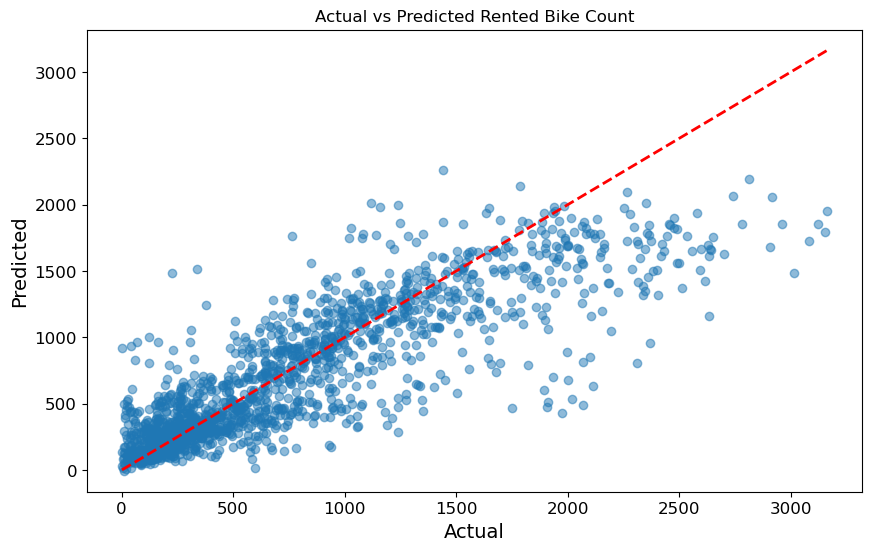

In [20]:
# Choose the best model based on mean RMSE
best_model = pipeline_lr if rmse_lr.mean() < rmse_best_svr.mean() else best_svr

# Fit the best model on the entire training set and evaluate on the test set
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Best Model Test RMSE: {rmse_test}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Rented Bike Count')
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [21]:
### Your answer here (maximum of 200 words)
# Chat GPT suggests optimizing both Linear Regression and Support Vector Regression models using GridSearchCV. However, the Linear Regression model is not necessarily 
# optimized with its hyperparameters. Thus, instead of fine-tuning both models with GridSearchCV, we only optimize the Support Vector Regression model and compare the 
# optimized model's RMSE with the baseline Linear Regression model to reduce the time consuming process of hyperparameter tuning.